In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-06-06 13:50:20.761858: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [4]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [5]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [6]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10195  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10197  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10198  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10199  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.209999   
1      4.113529  4.223896  63.821798  62.581992  ...           112.209999   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.699997   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.699997   
4      4.405489  4.587935  60.655199  58.351445  ...            56.239998   
...         ...       ...        ...        ...  ...                  ...   
10195  4.346215  4.374028  86.797202  86.444072  ...           -13.349999   
10196  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
10197  4.237512  4.264786  90.106352  89.978233  ...           105.129997   
10198  3.745458  3.792684  82.634552  82.112733  ...          -145.229996   
10199  3.823687  3.867705  84.046602  83.596072  ...          -147.250000   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.379997           22.689999            62.099998   
1               67.379997           22.689999            62.099998   
2              -98.750000          -52.799999            57.230000   
3              -98.750000          -52.799999            57.230000   
4              101.639999          146.940002            36.759998   
...                   ...                 ...                  ...   
10195          -57.930000         -102.669998            58.980000   
10196           60.469997           15.740000            52.669998   
10197           60.469997           15.740000            52.669998   
10198          -99.439995          -53.639999            52.279999   
10199         -101.619995          -55.939999            47.379997   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.959999           61.959999    20180403T030600Z   
1               50.959999           61.959999    20180403T030600Z   
2               45.759998           57.119999    20180404T042700Z   
3               45.759998           57.119999    20180404T042700Z   
4               27.439999           36.730000    20180404T175400Z   
...                   ...                 ...                 ...   
10195           47.930000           59.090000    20200121T132400Z   
10196           41.669998           52.629997    20200121T200600Z   
10197           41.669998           52.629997    20200121T200600Z   
10198           41.049999           52.180000    20200121T214800Z   
10199           36.430000           47.020000    20200121T221800Z   

             stop_sensing_time        u10        v10  
0      20180403T044758.125000Z   1.125562  -5.806792  
1      20180403T044758.125000Z   0.063789  -5.914661  
2      20180404T060858.125000Z  -0.424115   1.525726  
3      20180404T060858.125000Z   0.056819   2.623381  
4      20180404T193258.125000Z  -0.504271   6.171964  
...                        ...        ...        ...  
10195  20200121T150558.125000Z   1.487218  11.194811  
10196  20200121T2

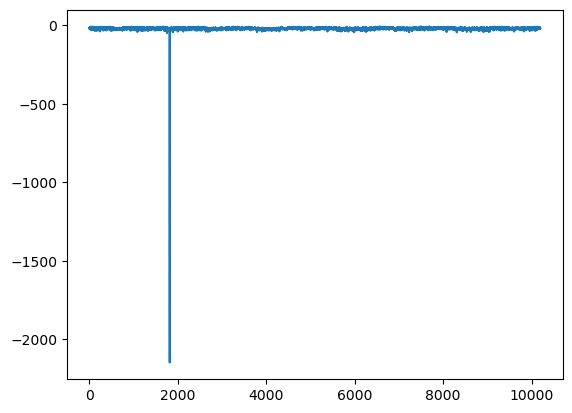

In [9]:
plt.plot(df['sigma0_trip_fore'])

In [12]:
df.replace(-2147.48364258, np.NaN)
df = df[df['sigma0_trip_fore'] > -2000]  
df = df[df['sigma0_trip_mid'] > -2000]  
df = df[df['sigma0_trip_aft'] > -2000]  

In [13]:
df = df.dropna(subset=['UWr', 'rhoair', 'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft'])
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10195  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10197  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10198  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10199  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.209999   
1      4.113529  4.223896  63.821798  62.581992  ...           112.209999   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.699997   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.699997   
4      4.405489  4.587935  60.655199  58.351445  ...            56.239998   
...         ...       ...        ...        ...  ...                  ...   
10195  4.346215  4.374028  86.797202  86.444072  ...           -13.349999   
10196  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
10197  4.237512  4.264786  90.106352  89.978233  ...           105.129997   
10198  3.745458  3.792684  82.634552  82.112733  ...          -145.229996   
10199  3.823687  3.867705  84.046602  83.596072  ...          -147.250000   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.379997           22.689999            62.099998   
1               67.379997           22.689999            62.099998   
2              -98.750000          -52.799999            57.230000   
3              -98.750000          -52.799999            57.230000   
4              101.639999          146.940002            36.759998   
...                   ...                 ...                  ...   
10195          -57.930000         -102.669998            58.980000   
10196           60.469997           15.740000            52.669998   
10197           60.469997           15.740000            52.669998   
10198          -99.439995          -53.639999            52.279999   
10199         -101.619995          -55.939999            47.379997   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.959999           61.959999    20180403T030600Z   
1               50.959999           61.959999    20180403T030600Z   
2               45.759998           57.119999    20180404T042700Z   
3               45.759998           57.119999    20180404T042700Z   
4               27.439999           36.730000    20180404T175400Z   
...                   ...                 ...                 ...   
10195           47.930000           59.090000    20200121T132400Z   
10196           41.669998           52.629997    20200121T200600Z   
10197           41.669998           52.629997    20200121T200600Z   
10198           41.049999           52.180000    20200121T214800Z   
10199           36.430000           47.020000    20200121T221800Z   

             stop_sensing_time        u10        v10  
0      20180403T044758.125000Z   1.125562  -5.806792  
1      20180403T044758.125000Z   0.063789  -5.914661  
2      20180404T060858.125000Z  -0.424115   1.525726  
3      20180404T060858.125000Z   0.056819   2.623381  
4      20180404T193258.125000Z  -0.504271   6.171964  
...                        ...        ...        ...  
10195  20200121T150558.125000Z   1.487218  11.194811  
10196  20200121T2

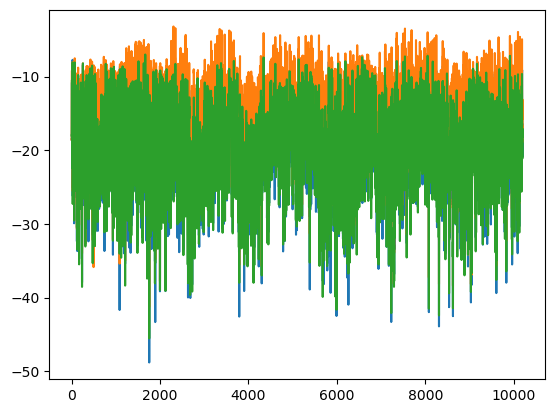

In [14]:
plt.plot(df['sigma0_trip_fore'])
plt.plot(df['sigma0_trip_mid'])
plt.plot(df['sigma0_trip_aft'])

In [15]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
1915 -0.201961 -0.217629  300.149998  2467.766767  1018.924802  1020.129993   
5536 -0.031340 -0.102991  321.374998  2484.597794   988.551234   989.756494   
2221 -0.135799 -0.012509  310.145003  2465.723847  1011.880901  1013.085001   
6987 -0.012150 -0.032903  326.110002  2477.074875   996.570243   997.777496   
1175 -0.017785  0.082188  379.199995  2470.373508  1017.583451  1018.793494   
...        ...       ...         ...          ...          ...          ...   
9124  0.002472 -0.483911  308.620000  2475.771411  1020.576401  1021.794510   
7835 -0.012150 -0.032903  243.709999  2490.722807  1016.129567  1017.383490   
9514 -0.015108 -0.023424  271.820003  2476.751921  1012.855845  1014.073492   
2286 -0.391373 -0.002490  284.445001  2467.199084  1014.255245  1015.480997   
8802 -0.012150 -0.032903  321.110001  2484.988187  1012.408873  1013.645007   

           Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
1915  9.066255  9.099421  91.289449  91.092949  ...          -144.729996   
5536  5.333242  5.367731  87.789078  87.512804  ...            67.919998   
2221  5.661709  5.865417  63.664547  61.978703  ...           -25.330000   
6987  4.968449  5.070391  73.010653  72.007445  ...           -17.820000   
1175  8.602273  8.619167  94.904951  94.999924  ...           -26.580000   
...        ...       ...        ...        ...  ...                  ...   
9124  7.769904  7.759034  91.002551  90.317374  ...           -22.109999   
7835  3.099227  3.176719  65.211853  63.882995  ...           109.180000   
9514  6.568907  6.622517  85.247003  84.662779  ...          -143.589996   
2286  3.755322  4.023864  57.463447  54.692455  ...           115.059998   
8802  4.919339  4.962065  84.284303  83.842230  ...           105.360001   

      azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
1915          -98.779999          -52.829998            57.230000   
5536          112.449997          156.919998            37.090000   
2221          -70.099998         -114.919998            56.259998   
6987          -62.509998         -107.159996            44.660000   
1175          -71.419998         -116.479996            37.680000   
...                  ...                 ...                  ...   
9124          -66.839996         -111.639999            63.369999   
7835           64.409996           19.490000            38.719997   
9514          -97.339996          -51.110001            60.009998   
2286           70.220001           25.500000            53.320000   
8802           60.689999           16.109999            51.349998   

      inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
1915           45.759998           57.110001    20180925T042400Z   
5536           27.869999           36.969997    20161202T133600Z   
2221           45.200001           56.329998    20171118T150600Z   
6987           34.349998           44.660000    20200902T134500Z   
1175           28.279999           37.750000    20160916T183000Z   
...                  ...                 ...                 ...   
9124           52.379997           63.459999    20190507T190000Z   
7835           29.119999           38.680000    20210118T195700Z   
9514           48.439999           59.899998    20190816T223300Z   
2286           42.270000           53.199997    20171207T233900Z   
8802           40.419998           51.230000    20210618T204800Z   

            stop_sensing_time        u10        v10  
1915  20180925T060558.125000Z  -1.324996  -9.157287  
5536  20161202T151758.125000Z   8.425657   5.831279  
2221  20171118T164758.125000Z   5.696388   4.825567  
6987  20200902T152358.125000Z   5.843737 -12.798964  
1175  20160916T201158.125000Z   2.068844  -4.017464  
...                       ...        ...        ...  
9124  20190507T203858.125000Z   3.252593  -6.708321  
7835  20210118T213858.125000Z   6.045154   7.037160  
9514  20190817T001

In [16]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

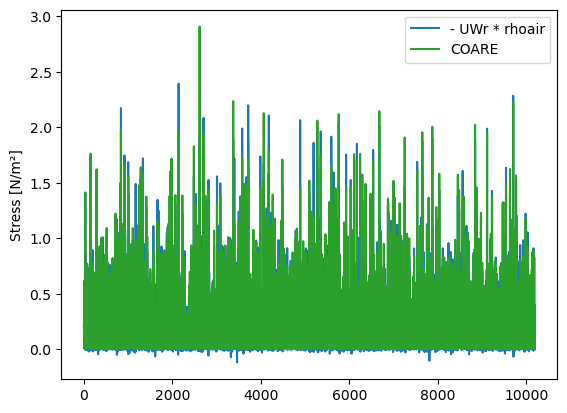

In [17]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

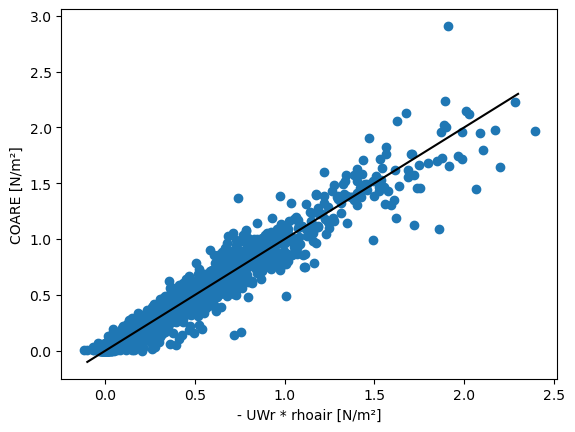

In [18]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [19]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [20]:
df.shape

(10195, 67)

In [21]:
df.shape[0]*0.8

8156.0

In [22]:
split_idx = 8160

# Prepare features and labels

In [23]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft'#,
    #'u10', 'v10'
]

In [24]:
x = df[predictor_variables]
x

sigma0_trip_fore  sigma0_trip_mid  sigma0_trip_aft  azi_angle_trip_fore  \
1915        -15.643591       -14.756548       -17.875481          -144.729996   
5536        -11.166398        -8.401650       -16.121201            67.919998   
2221        -24.999752       -20.183023       -19.687904           -25.330000   
6987        -12.603307       -11.382163       -18.178478           -17.820000   
1175        -20.298883       -15.279989       -21.286087           -26.580000   
...                ...              ...              ...                  ...   
9124        -24.470440       -23.885769       -28.561481           -22.109999   
7835        -15.903352        -9.203181       -15.835526           109.180000   
9514        -25.477020       -18.234964       -19.713820          -143.589996   
2286        -15.376673       -11.917556       -17.895863           115.059998   
8802        -24.489817       -20.958727       -26.777082           105.360001   

      azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
1915          -98.779999          -52.829998            57.230000   
5536          112.449997          156.919998            37.090000   
2221          -70.099998         -114.919998            56.259998   
6987          -62.509998         -107.159996            44.660000   
1175          -71.419998         -116.479996            37.680000   
...                  ...                 ...                  ...   
9124          -66.839996         -111.639999            63.369999   
7835           64.409996           19.490000            38.719997   
9514          -97.339996          -51.110001            60.009998   
2286           70.220001           25.500000            53.320000   
8802           60.689999           16.109999            51.349998   

      inc_angle_trip_mid  inc_angle_trip_aft  
1915           45.759998           57.110001  
5536           27.869999           36.969997  
2221           45.200001           56.329998  
6987           34.349998           44.660000  
1175           28.279999           37.750000  
...                  ...                 ...  
9124           52.379997           63.459999  
7835           29.119999           38.680000  
9514           48.439999           59.899998  
2286           42.270000           53.199997  
8802           40.419998           51.230000  

[10195 rows x 9 columns]

In [25]:
y = np.sqrt(df['u10']**2 + df['v10']**2)

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [26]:
c = np.sqrt(df['UE']**2 + df['UN']**2)

In [27]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [28]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [29]:
c_train = c[:split_idx]
c_test = c[split_idx:]

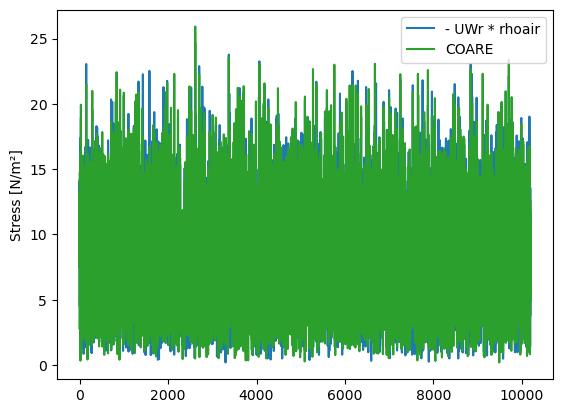

In [30]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [31]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [32]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [33]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [34]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-06-06 13:58:03.059775: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-06 13:58:03.061196: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-06 13:58:03.061206: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-06 13:58:03.061228: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-gm5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-06-06 13:58:03.061748: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
179/179 [==============================] - 1s 5ms/step - loss: 1.2594 - mean_absolute_error: 0.8875 - val_loss: 0.8784 - val_mean_absolute_error: 0.7308
Epoch 2/500
179/179 [==============================] - 0s 700us/step - loss: 0.8398 - mean_absolute_error: 0.7231 - val_loss: 0.7267 - val_mean_absolute_error: 0.6597
Epoch 3/500
179/179 [==============================] - 0s 693us/step - loss: 0.7269 - mean_absolute_error: 0.6652 - val_loss: 0.6912 - val_mean_absolute_error: 0.6365
Epoch 4/500
179/179 [==============================] - 0s 719us/step - loss: 0.7334 - mean_absolute_error: 0.6618 - val_loss: 0.6830 - val_mean_absolute_error: 0.6283
Epoch 5/500
179/179 [==============================] - 0s 685us/step - loss: 0.7275 - mean_absolute_error: 0.6565 - val_loss: 0.6797 - val_mean_absolute_error: 0.6243
Epoch 6/500
179/179 [==============================] - 0s 679us/step - loss: 0.6963 - mean_absolute_error: 0.6374 - val_loss: 0.6778 - val_mean_absolute_error: 0.6231


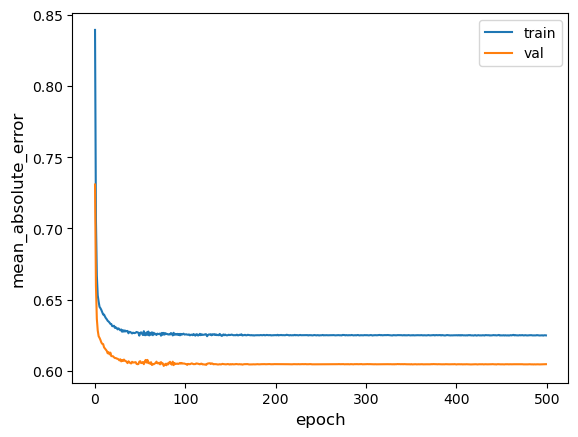

64/64 [==============================] - 0s 333us/step - loss: 0.6941 - mean_absolute_error: 0.6284
Test accuracy 0.6284183263778687
Test loss 0.6940720677375793


In [35]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [36]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [37]:
np.mean(y_test)

8.309828132993244

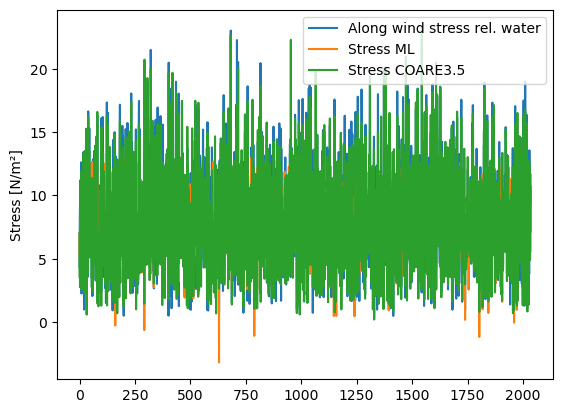

In [38]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

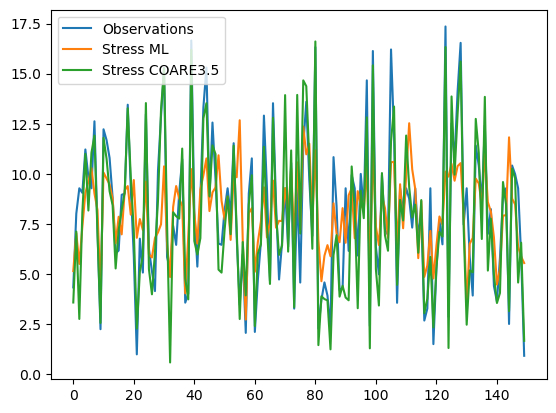

In [39]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Wind speed ML [m/s]')

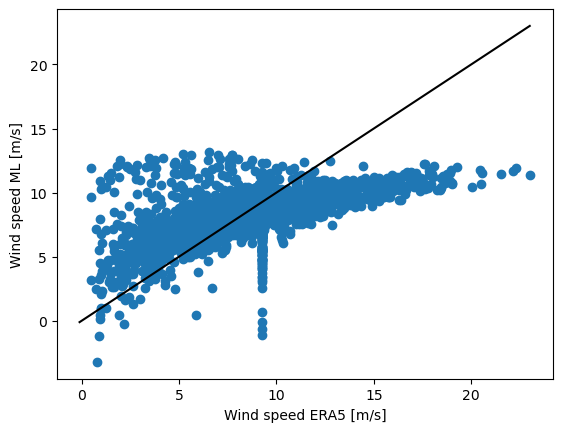

In [40]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

Text(0, 0.5, 'Wind speed ML [m/s]')

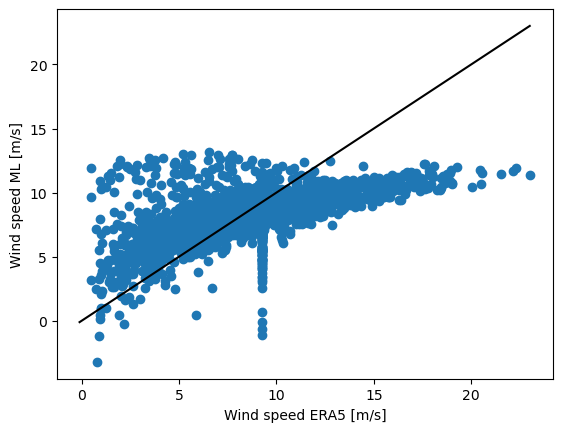

In [41]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [42]:
rmse(y_test.values, y_test_pred)

4.284971505349663

In [43]:
rmse(y_test.values, c_test)

2.0225046276795084

## Correlation

In [44]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.59092755],
       [0.59092755, 1.        ]])

In [45]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

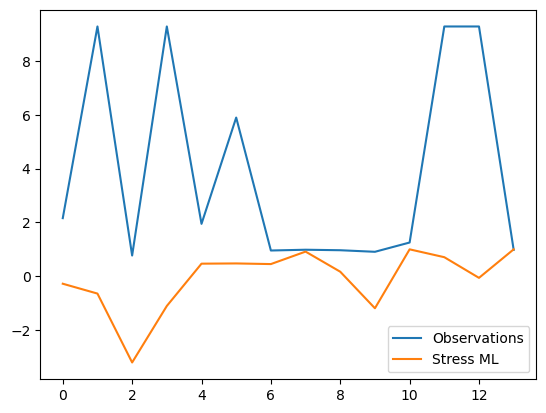

In [46]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [47]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[ 1.        , -0.03398488],
       [-0.03398488,  1.        ]])

In [48]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[ 1.        , -0.09273218],
       [-0.09273218,  1.        ]])

In [49]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

5.487587298099363

# Other experiments

In [50]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [51]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [52]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.6110 - mean_absolute_error: 0.9809 - val_loss: 0.9550 - val_mean_absolute_error: 0.7376
Epoch 2/500
179/179 [==============================] - 0s 876us/step - loss: 0.9158 - mean_absolute_error: 0.7393 - val_loss: 0.7320 - val_mean_absolute_error: 0.6372
Epoch 3/500
179/179 [==============================] - 0s 866us/step - loss: 0.7493 - mean_absolute_error: 0.6530 - val_loss: 0.6724 - val_mean_absolute_error: 0.6037
Epoch 4/500
179/179 [==============================] - 0s 813us/step - loss: 0.7150 - mean_absolute_error: 0.6319 - val_loss: 0.6447 - val_mean_absolute_error: 0.5899
Epoch 5/500
179/179 [==============================] - 0s 843us/step - loss: 0.6996 - mean_absolute_error: 0.6198 - val_loss: 0.6320 - val_mean_absolute_error: 0.5830
Epoch 6/500
179/179 [==============================] - 0s 862us/step - loss: 0.6513 - mean_absolute_error: 0.5958 - val_loss: 0.6231 - val_mean_absolute_error: 0.5782


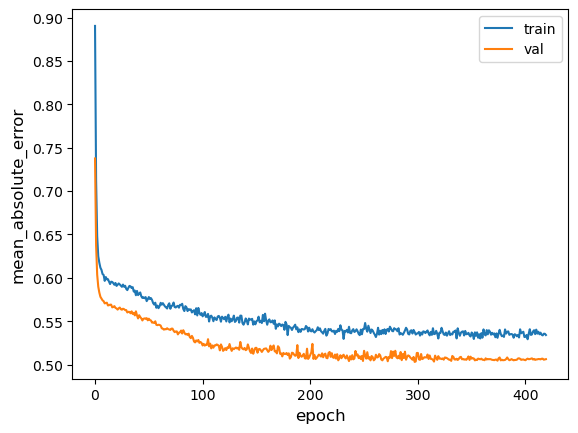

64/64 [==============================] - 0s 365us/step - loss: 0.4995 - mean_absolute_error: 0.5245
Test accuracy 0.524468719959259
Test loss 0.4994608461856842


In [53]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [54]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

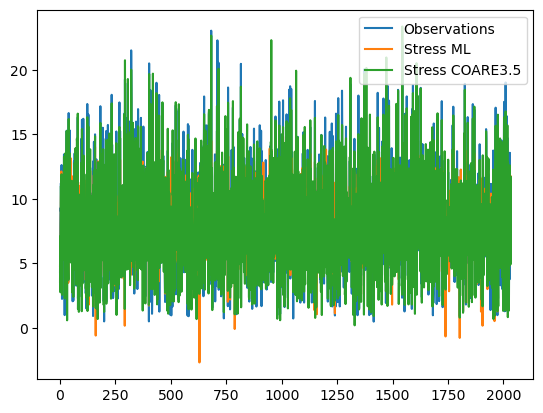

In [55]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

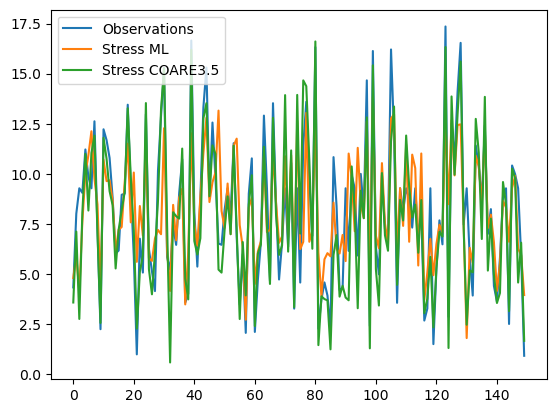

In [56]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [57]:
rmse(y_test.values, y_test_pred)

4.588171275827618

## Correlation

In [58]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.72806272],
       [0.72806272, 1.        ]])

In [59]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

In [60]:
y_test.values.shape

(2035,)

In [61]:
y_test_pred[:, 0].shape

(2035,)

In [62]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [63]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([ 4.32908869,  8.00801908,  9.27715013, ...,  5.78662959,
       10.78261348,  9.27715013])

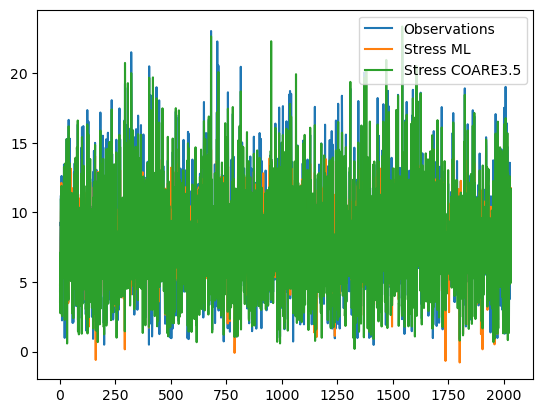

In [64]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

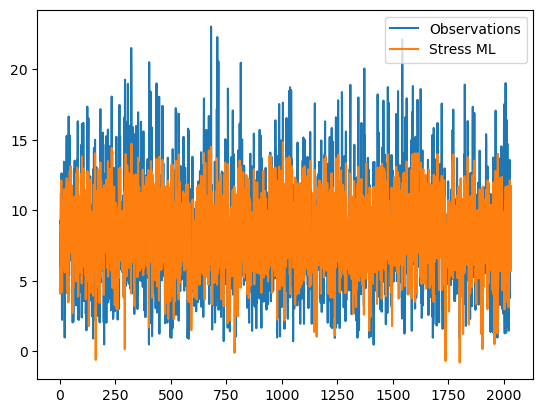

In [65]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [66]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.86692464],
       [0.86692464, 1.        ]])

In [67]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

4.579820412578596

Text(0, 0.5, 'Wind speed ML [m/s]')

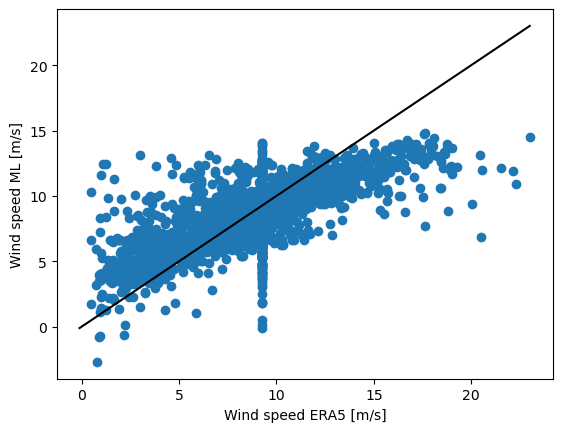

In [68]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [69]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [70]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [71]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 1s 2ms/step - loss: 2.0503 - mean_absolute_error: 1.0985 - val_loss: 0.7956 - val_mean_absolute_error: 0.6658
Epoch 2/500
90/90 [==============================] - 0s 1ms/step - loss: 1.4295 - mean_absolute_error: 0.9160 - val_loss: 0.7391 - val_mean_absolute_error: 0.6387
Epoch 3/500
90/90 [==============================] - 0s 1ms/step - loss: 1.1132 - mean_absolute_error: 0.8096 - val_loss: 0.7023 - val_mean_absolute_error: 0.6198
Epoch 4/500
90/90 [==============================] - 0s 1ms/step - loss: 0.9876 - mean_absolute_error: 0.7579 - val_loss: 0.6744 - val_mean_absolute_error: 0.6059
Epoch 5/500
90/90 [==============================] - 0s 1ms/step - loss: 0.9073 - mean_absolute_error: 0.7251 - val_loss: 0.6532 - val_mean_absolute_error: 0.5942
Epoch 6/500
90/90 [==============================] - 0s 1ms/step - loss: 0.8841 - mean_absolute_error: 0.7049 - val_loss: 0.6396 - val_mean_absolute_error: 0.5859
Epoch 7/500
90/90 [===

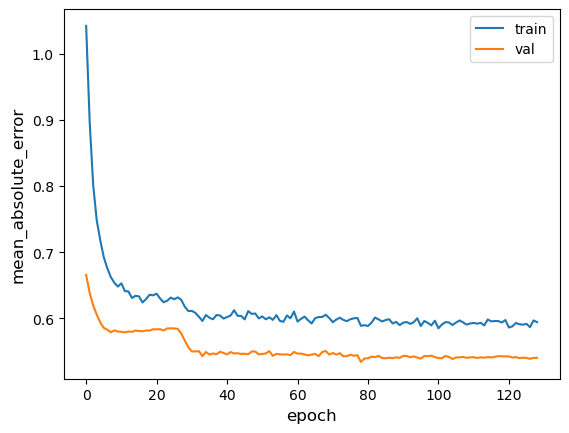

64/64 [==============================] - 0s 351us/step - loss: 0.5614 - mean_absolute_error: 0.5693
Test accuracy 0.5692852735519409
Test loss 0.5613938570022583


In [72]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [73]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [74]:
rmse(y_test.values, y_test_pred)

4.28984863452641

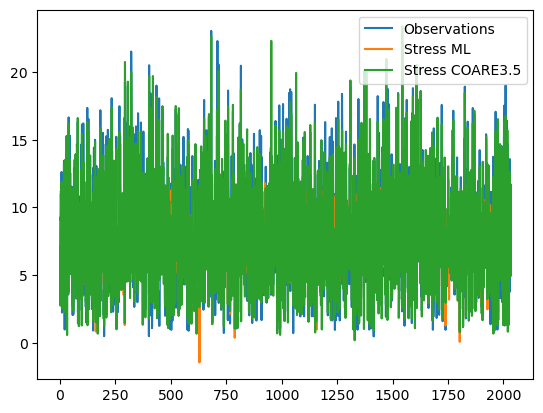

In [75]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

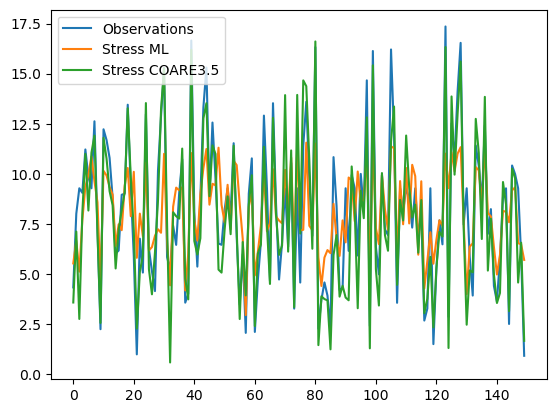

In [76]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Wind speed ML [m/s]')

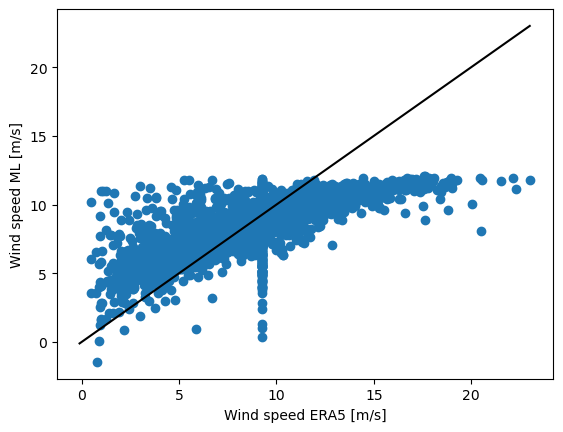

In [77]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

## Correlation

In [78]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.70103151],
       [0.70103151, 1.        ]])

In [79]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

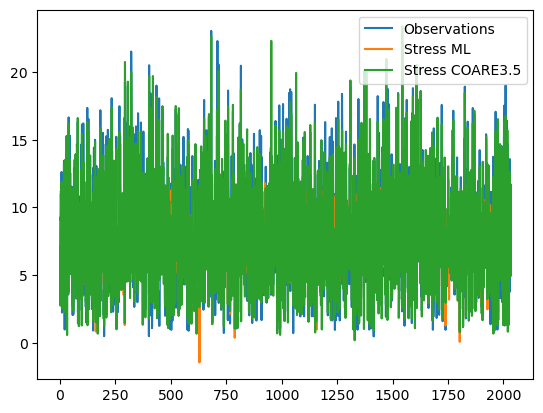

In [80]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

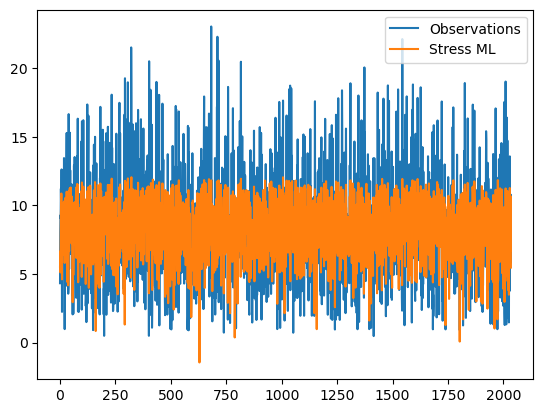

In [81]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [82]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

In [83]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

4.28984863452641

Text(0, 0.5, 'Wind speed ML [m/s]')

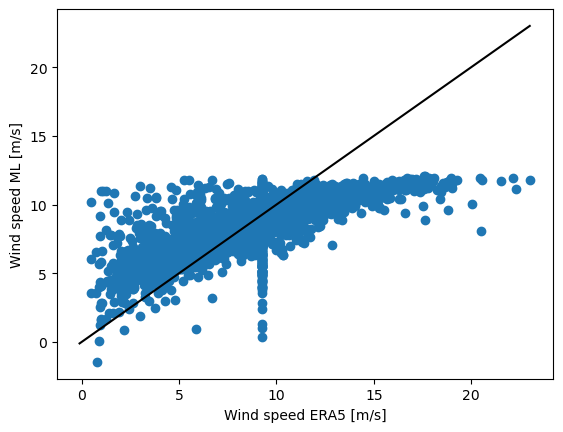

In [84]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [85]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [86]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [87]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 3.3772 - mean_absolute_error: 1.4648 - val_loss: 1.0345 - val_mean_absolute_error: 0.7883
Epoch 2/500
179/179 [==============================] - 0s 817us/step - loss: 1.4865 - mean_absolute_error: 0.9461 - val_loss: 0.8308 - val_mean_absolute_error: 0.6922
Epoch 3/500
179/179 [==============================] - 0s 817us/step - loss: 1.1534 - mean_absolute_error: 0.8239 - val_loss: 0.7425 - val_mean_absolute_error: 0.6520
Epoch 4/500
179/179 [==============================] - 0s 819us/step - loss: 0.9873 - mean_absolute_error: 0.7550 - val_loss: 0.7045 - val_mean_absolute_error: 0.6344
Epoch 5/500
179/179 [==============================] - 0s 778us/step - loss: 0.9081 - mean_absolute_error: 0.7270 - val_loss: 0.6787 - val_mean_absolute_error: 0.6180
Epoch 6/500
179/179 [==============================] - 0s 776us/step - loss: 0.8594 - mean_absolute_error: 0.7033 - val_loss: 0.6643 - val_mean_absolute_error: 0.6085


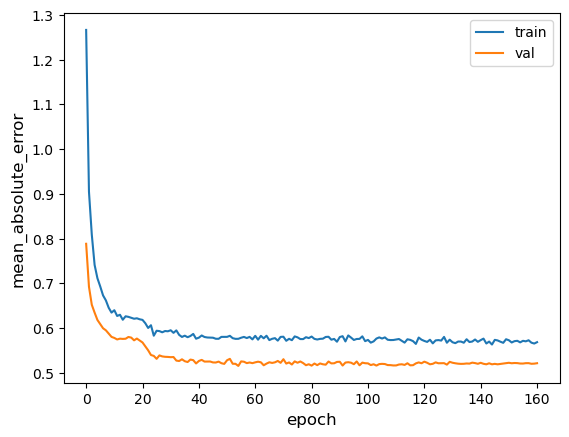

64/64 [==============================] - 0s 390us/step - loss: 0.5068 - mean_absolute_error: 0.5393
Test accuracy 0.5392691493034363
Test loss 0.5068392753601074


In [88]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [89]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [90]:
rmse(y_test.values, y_test_pred)

4.415172556847651

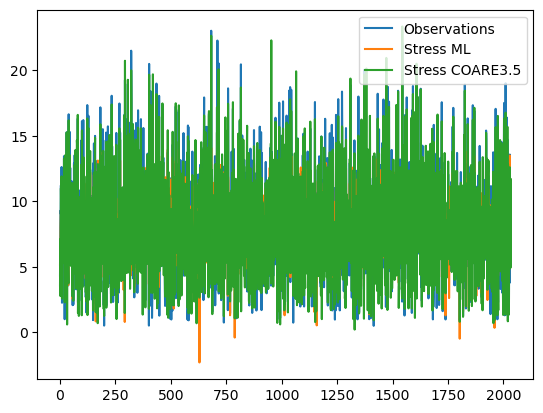

In [91]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

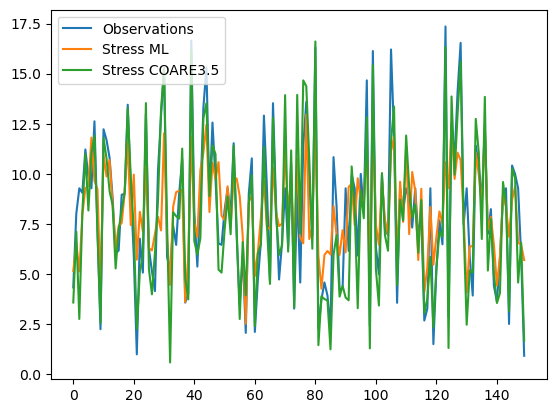

In [92]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Wind speed ML [m/s]')

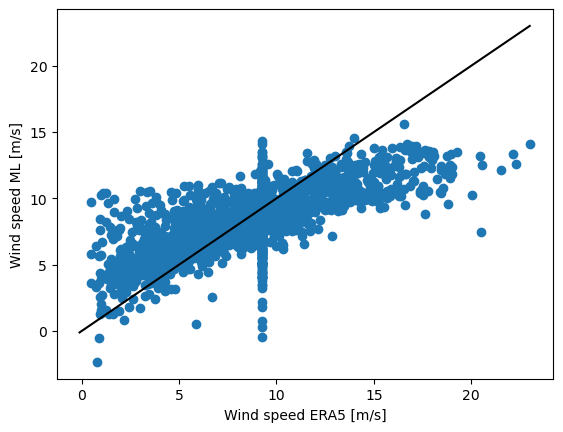

In [93]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

## Correlation

In [94]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73065365],
       [0.73065365, 1.        ]])

In [95]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

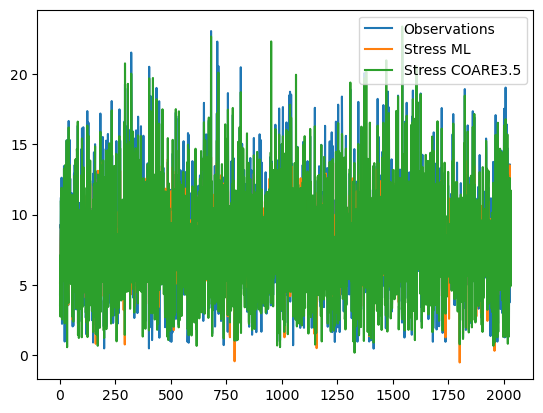

In [96]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

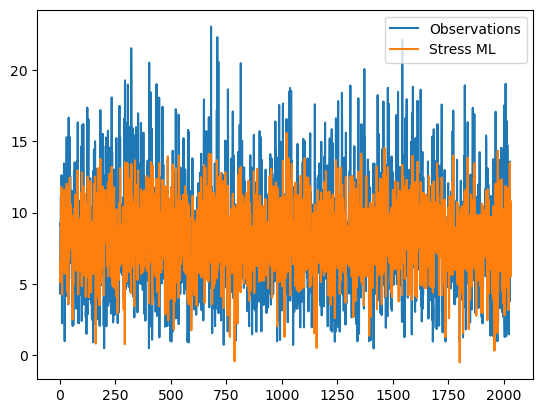

In [97]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [98]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.86692464],
       [0.86692464, 1.        ]])

In [99]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

4.406863644693723

Text(0, 0.5, 'Wind speed ML [m/s]')

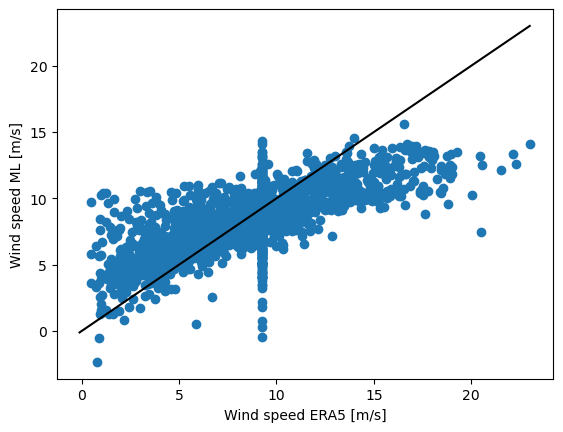

In [100]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [101]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [102]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [103]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 2ms/step - loss: 1.5363 - mean_absolute_error: 0.9415 - val_loss: 0.7622 - val_mean_absolute_error: 0.6680
Epoch 2/500
179/179 [==============================] - 0s 1ms/step - loss: 0.9457 - mean_absolute_error: 0.7465 - val_loss: 0.6407 - val_mean_absolute_error: 0.5953
Epoch 3/500
179/179 [==============================] - 0s 1ms/step - loss: 0.7612 - mean_absolute_error: 0.6658 - val_loss: 0.5169 - val_mean_absolute_error: 0.5269
Epoch 4/500
179/179 [==============================] - 0s 1ms/step - loss: 0.6237 - mean_absolute_error: 0.6049 - val_loss: 0.4713 - val_mean_absolute_error: 0.5100
Epoch 5/500
179/179 [==============================] - 0s 1ms/step - loss: 0.5668 - mean_absolute_error: 0.5756 - val_loss: 0.4702 - val_mean_absolute_error: 0.5140
Epoch 6/500
179/179 [==============================] - 0s 1ms/step - loss: 0.5397 - mean_absolute_error: 0.5573 - val_loss: 0.4443 - val_mean_absolute_error: 0.4974
Epoch 7/50

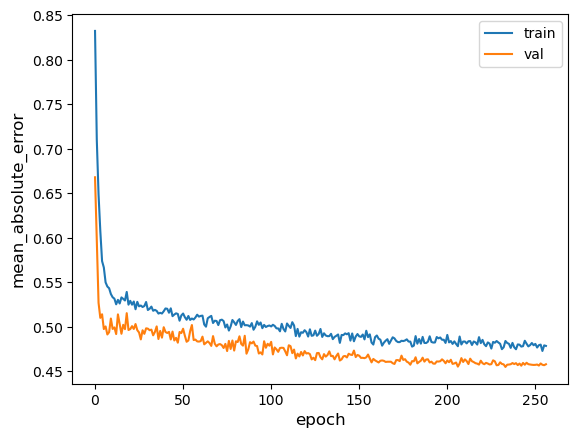

64/64 [==============================] - 0s 330us/step - loss: 0.3723 - mean_absolute_error: 0.4585
Test accuracy 0.4585472047328949
Test loss 0.37231430411338806


In [104]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [105]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [106]:
rmse(y_test.values, y_test_pred)

4.738240986909422

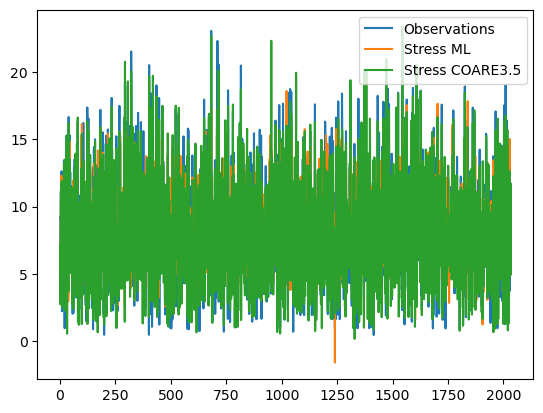

In [107]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

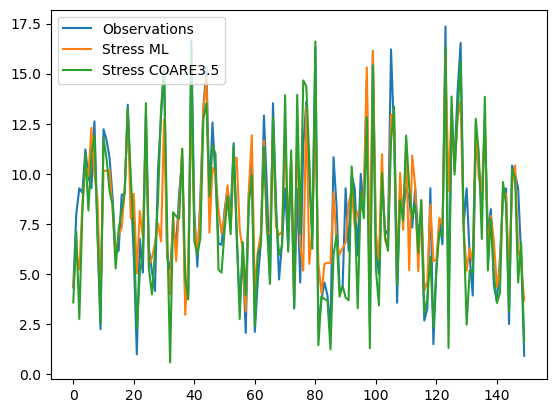

In [108]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Wind speed ML [m/s]')

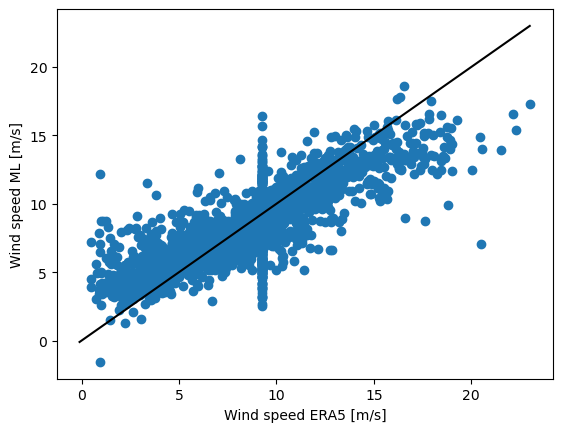

In [109]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

## Correlation

In [110]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.80635531],
       [0.80635531, 1.        ]])

In [111]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

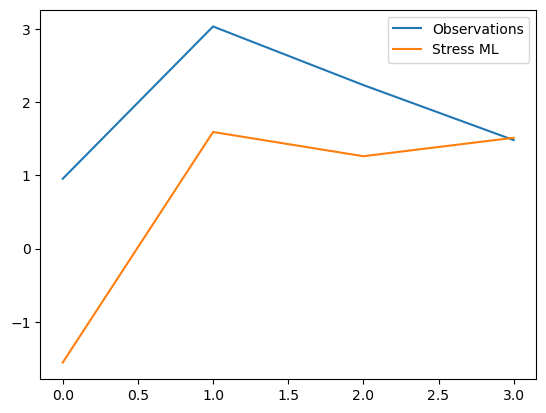

In [112]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [113]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.40732015],
       [0.40732015, 1.        ]])

In [114]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

1.6846104838095366

Text(0, 0.5, 'Wind speed ML [m/s]')

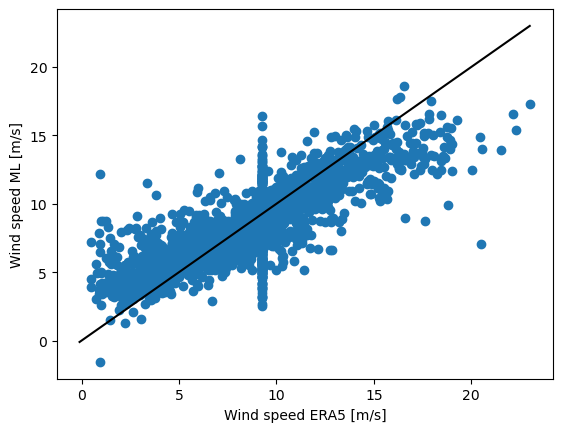

In [115]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

## Correlation

In [116]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.80635531],
       [0.80635531, 1.        ]])

In [117]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

In [118]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [119]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [120]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 2s 7ms/step - loss: 2.8437 - mean_absolute_error: 1.1923 - val_loss: 0.8155 - val_mean_absolute_error: 0.6917
Epoch 2/500
179/179 [==============================] - 1s 4ms/step - loss: 0.8932 - mean_absolute_error: 0.7294 - val_loss: 0.6731 - val_mean_absolute_error: 0.6175
Epoch 3/500
179/179 [==============================] - 1s 4ms/step - loss: 0.7310 - mean_absolute_error: 0.6616 - val_loss: 0.5083 - val_mean_absolute_error: 0.5339
Epoch 4/500
179/179 [==============================] - 1s 4ms/step - loss: 0.6508 - mean_absolute_error: 0.6146 - val_loss: 0.5154 - val_mean_absolute_error: 0.5304
Epoch 5/500
179/179 [==============================] - 1s 4ms/step - loss: 0.5804 - mean_absolute_error: 0.5826 - val_loss: 0.4949 - val_mean_absolute_error: 0.5205
Epoch 6/500
179/179 [==============================] - 1s 4ms/step - loss: 0.5584 - mean_absolute_error: 0.5689 - val_loss: 0.4689 - val_mean_absolute_error: 0.5092
Epoch 7/50

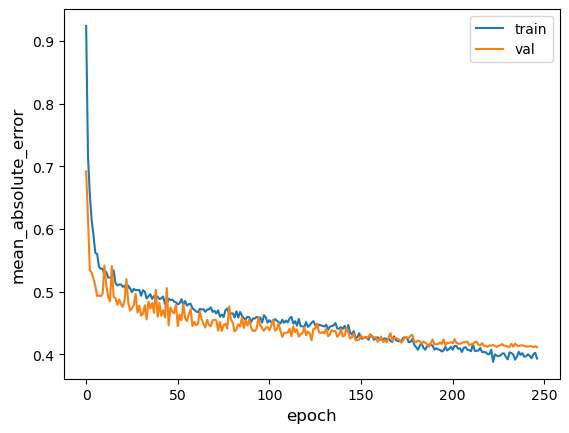

64/64 [==============================] - 0s 714us/step - loss: 0.3139 - mean_absolute_error: 0.4197
Test accuracy 0.4196598529815674
Test loss 0.31389567255973816


In [121]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [122]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [123]:
rmse(y_test.values, y_test_pred)

5.002522215158717

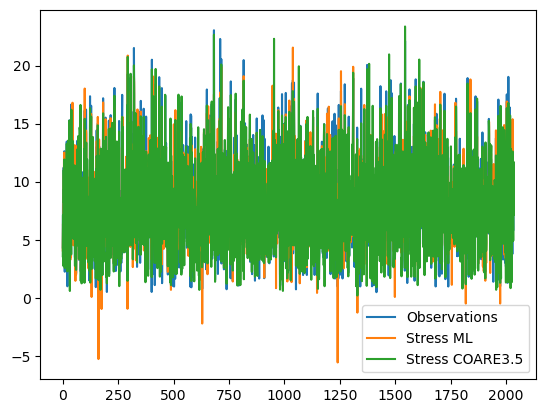

In [124]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

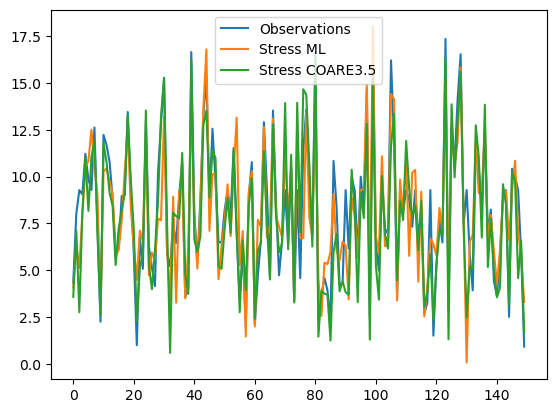

In [125]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [126]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84126673],
       [0.84126673, 1.        ]])

In [127]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

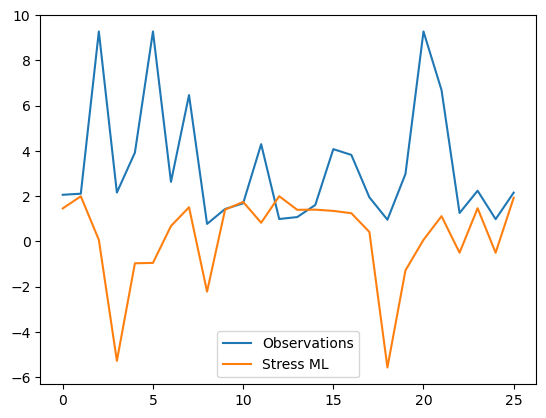

In [128]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [129]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.39736797],
       [0.39736797, 1.        ]])

In [130]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

4.538584832196902

Text(0, 0.5, 'Wind speed ML [m/s]')

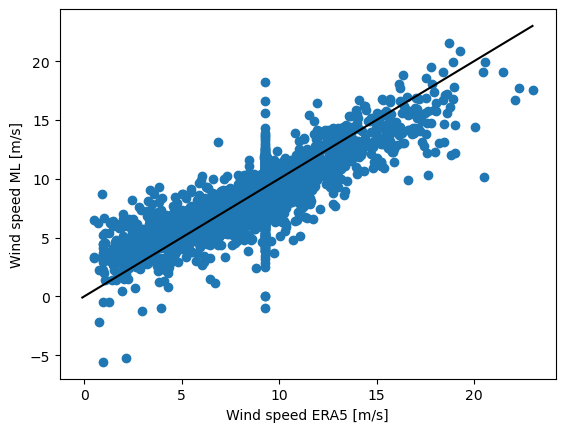

In [131]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [132]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [133]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [134]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 3s 13ms/step - loss: 3.1158 - mean_absolute_error: 1.2181 - val_loss: 0.8949 - val_mean_absolute_error: 0.7358
Epoch 2/500
179/179 [==============================] - 2s 12ms/step - loss: 1.0025 - mean_absolute_error: 0.7718 - val_loss: 0.7442 - val_mean_absolute_error: 0.6670
Epoch 3/500
179/179 [==============================] - 2s 12ms/step - loss: 0.7986 - mean_absolute_error: 0.6876 - val_loss: 0.6097 - val_mean_absolute_error: 0.6041
Epoch 4/500
179/179 [==============================] - 2s 12ms/step - loss: 0.7129 - mean_absolute_error: 0.6447 - val_loss: 0.6279 - val_mean_absolute_error: 0.6120
Epoch 5/500
179/179 [==============================] - 2s 12ms/step - loss: 0.6188 - mean_absolute_error: 0.6059 - val_loss: 0.4555 - val_mean_absolute_error: 0.5031
Epoch 6/500
179/179 [==============================] - 2s 12ms/step - loss: 0.5706 - mean_absolute_error: 0.5696 - val_loss: 0.4825 - val_mean_absolute_error: 0.5066
Epoc

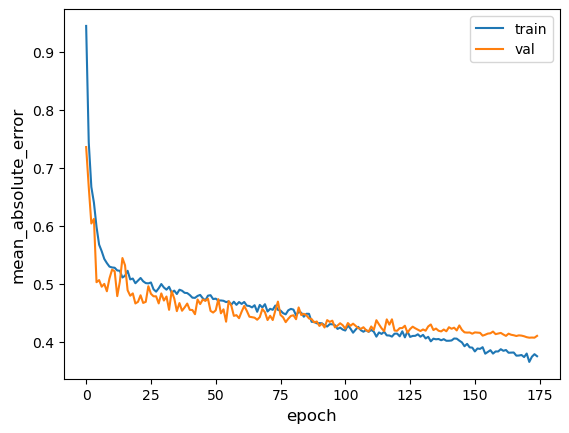

64/64 [==============================] - 0s 3ms/step - loss: 0.3067 - mean_absolute_error: 0.4128
Test accuracy 0.4128068685531616
Test loss 0.3067282736301422


In [135]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [136]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [137]:
rmse(y_test.values, y_test_pred)

4.900292864491105

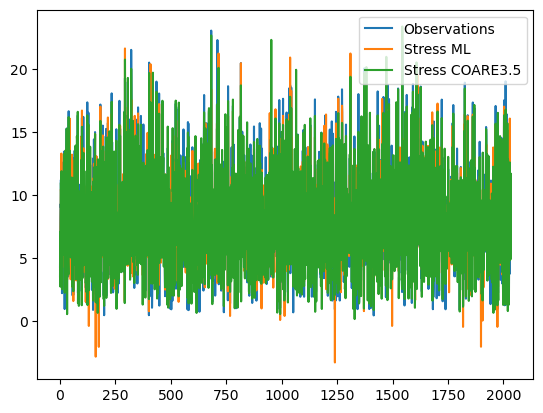

In [138]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

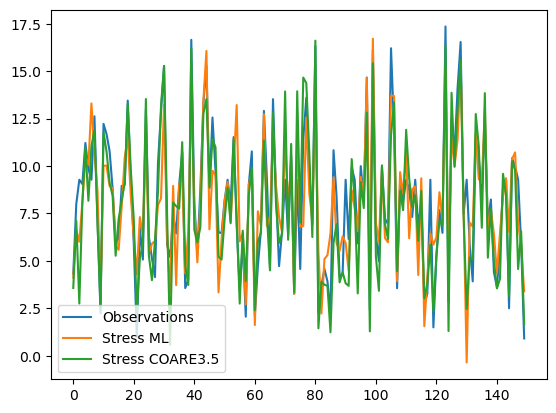

In [139]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [140]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84491721],
       [0.84491721, 1.        ]])

In [141]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

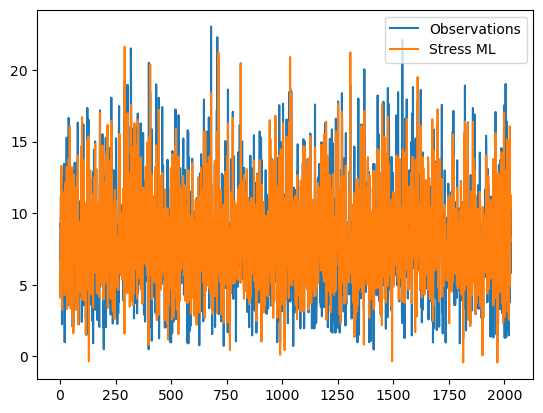

In [142]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [143]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.86653561],
       [0.86653561, 1.        ]])

In [144]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

4.875472946961159

Text(0, 0.5, 'Wind speed ML [m/s]')

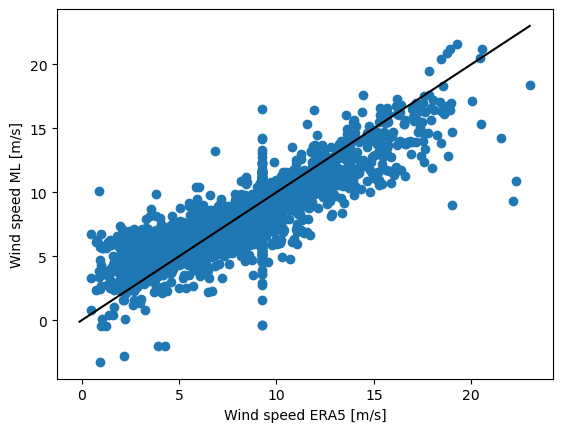

In [145]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

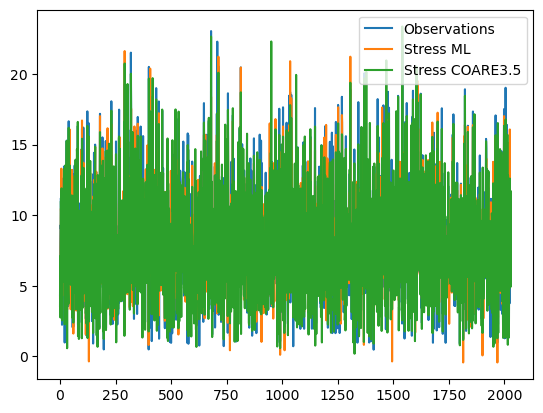

In [146]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

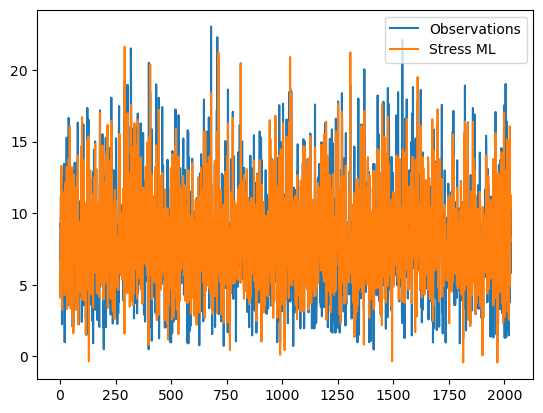

In [147]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [148]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.84647765],
       [0.84647765, 1.        ]])

In [149]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.86653561],
       [0.86653561, 1.        ]])

In [150]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

4.875472946961159

Text(0, 0.5, 'Wind speed ML [m/s]')

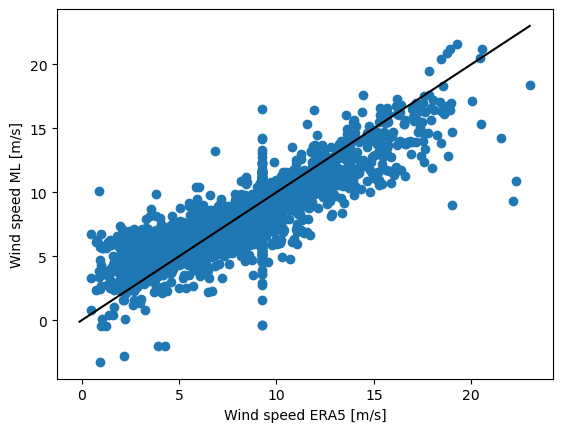

In [151]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [152]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [153]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [154]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 42ms/step - loss: 14.7905 - mean_absolute_error: 2.4059 - val_loss: 1.0061 - val_mean_absolute_error: 0.7748
Epoch 2/500
12/12 [==============================] - 0s 31ms/step - loss: 1.5978 - mean_absolute_error: 0.9752 - val_loss: 0.9571 - val_mean_absolute_error: 0.7515
Epoch 3/500
12/12 [==============================] - 0s 31ms/step - loss: 1.2097 - mean_absolute_error: 0.8440 - val_loss: 1.0261 - val_mean_absolute_error: 0.7821
Epoch 4/500
12/12 [==============================] - 0s 30ms/step - loss: 1.1065 - mean_absolute_error: 0.8086 - val_loss: 1.0226 - val_mean_absolute_error: 0.7807
Epoch 5/500
12/12 [==============================] - 0s 30ms/step - loss: 1.0768 - mean_absolute_error: 0.8006 - val_loss: 0.9893 - val_mean_absolute_error: 0.7658
Epoch 6/500
12/12 [==============================] - 0s 31ms/step - loss: 1.0074 - mean_absolute_error: 0.7690 - val_loss: 1.0169 - val_mean_absolute_error: 0.7808
Epoch 7/500
12/

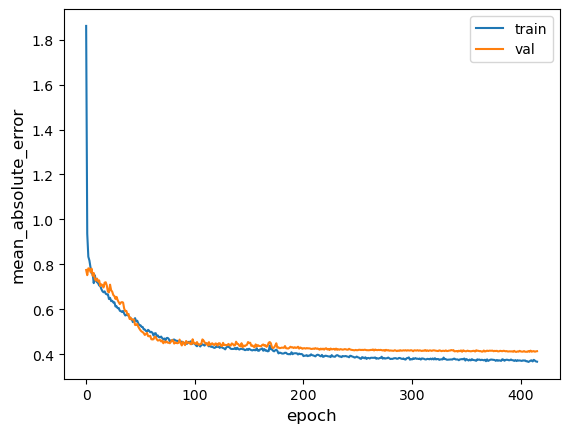

64/64 [==============================] - 0s 3ms/step - loss: 0.2963 - mean_absolute_error: 0.4099
Test accuracy 0.40994709730148315
Test loss 0.29634785652160645


In [155]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [156]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [157]:
rmse(y_test.values, y_test_pred)

4.944101948646757

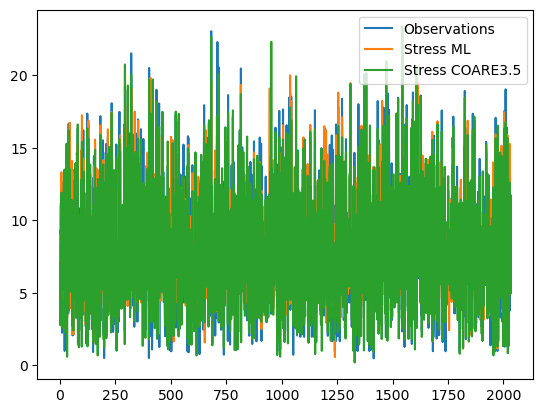

In [158]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

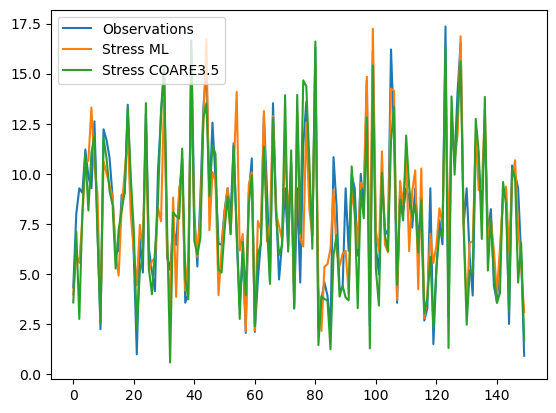

In [159]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [160]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84931726],
       [0.84931726, 1.        ]])

In [161]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

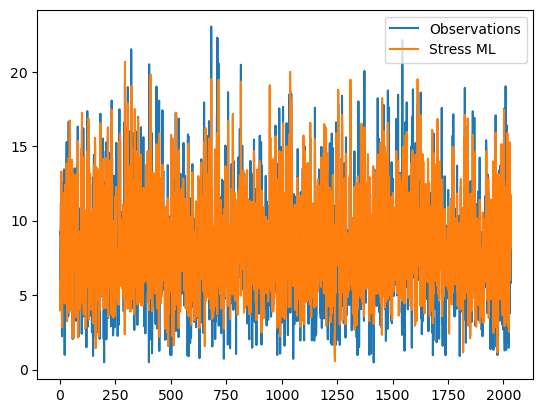

In [162]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [163]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

In [164]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

4.944101948646757

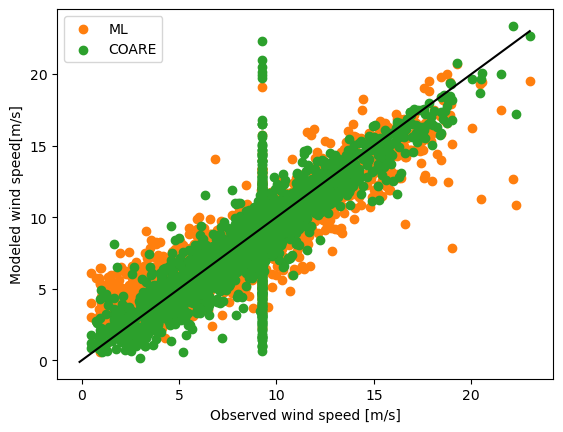

In [165]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed[m/s]') 
plt.legend()

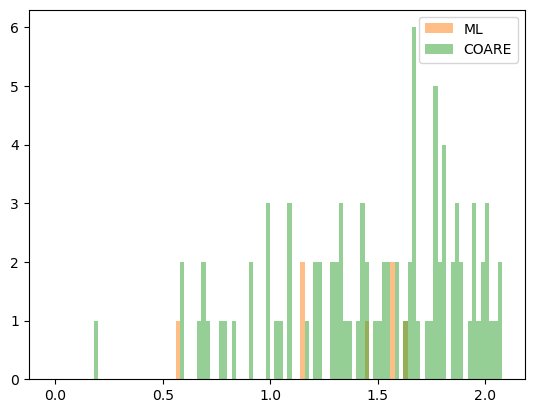

In [166]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [167]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [168]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [169]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 42ms/step - loss: 19.2640 - mean_absolute_error: 2.6785 - val_loss: 0.9290 - val_mean_absolute_error: 0.7438
Epoch 2/500
12/12 [==============================] - 0s 30ms/step - loss: 1.4620 - mean_absolute_error: 0.9331 - val_loss: 0.8162 - val_mean_absolute_error: 0.6958
Epoch 3/500
12/12 [==============================] - 0s 31ms/step - loss: 1.2161 - mean_absolute_error: 0.8543 - val_loss: 0.8946 - val_mean_absolute_error: 0.7332
Epoch 4/500
12/12 [==============================] - 0s 34ms/step - loss: 1.0745 - mean_absolute_error: 0.7972 - val_loss: 1.0012 - val_mean_absolute_error: 0.7807
Epoch 5/500
12/12 [==============================] - 0s 32ms/step - loss: 1.0201 - mean_absolute_error: 0.7816 - val_loss: 1.0559 - val_mean_absolute_error: 0.8045
Epoch 6/500
12/12 [==============================] - 0s 32ms/step - loss: 0.9585 - mean_absolute_error: 0.7644 - val_loss: 1.0265 - val_mean_absolute_error: 0.7922
Epoch 7/500
12/

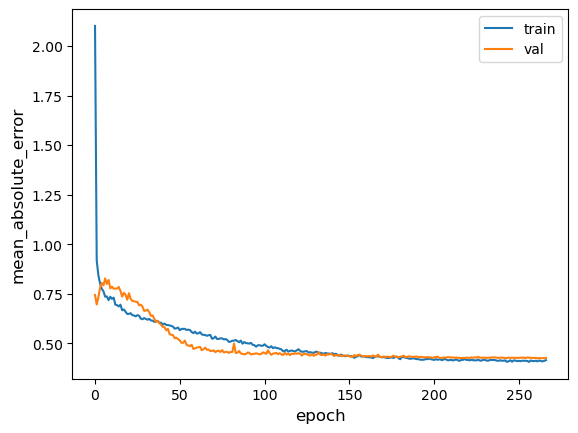

64/64 [==============================] - 0s 2ms/step - loss: 0.3146 - mean_absolute_error: 0.4240
Test accuracy 0.42399734258651733
Test loss 0.31459999084472656


In [170]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [171]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [172]:
rmse(y_test.values, y_test_pred)

4.871932312231065

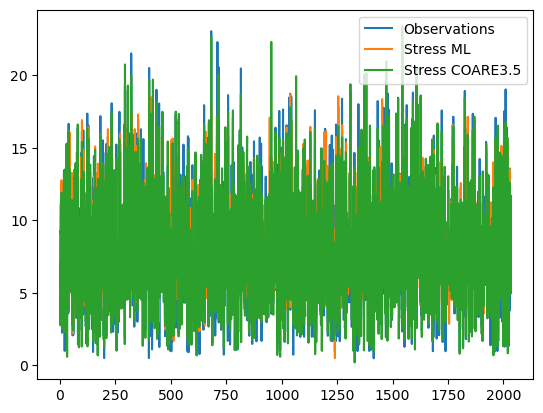

In [173]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

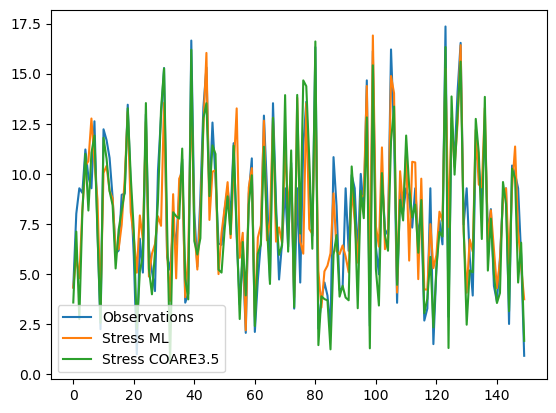

In [174]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [175]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.83879799],
       [0.83879799, 1.        ]])

In [176]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

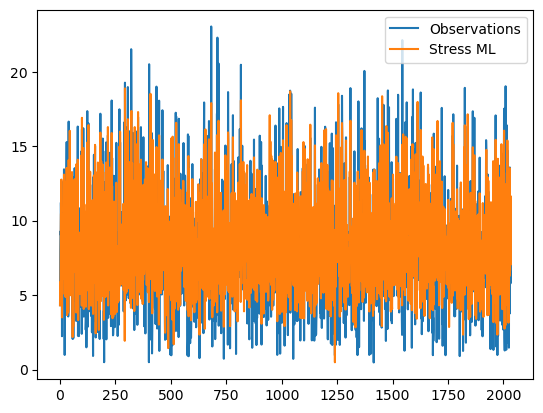

In [177]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [178]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

In [179]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

4.871932312231065

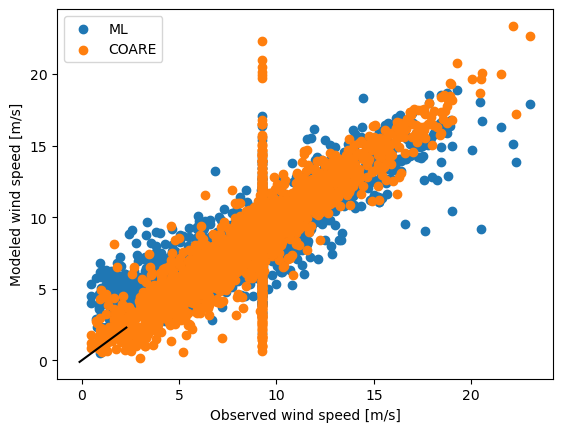

In [180]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed [m/s]') 
plt.legend()

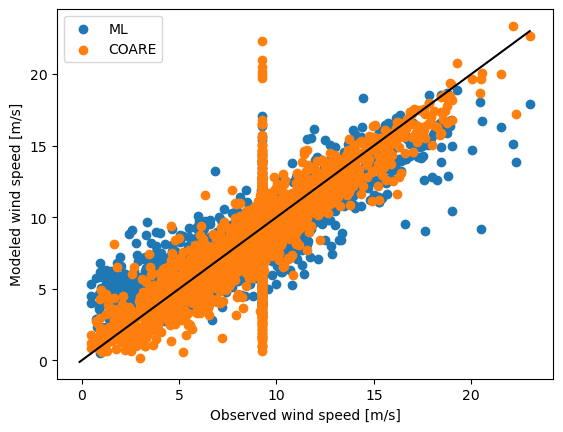

In [181]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed [m/s]') 
plt.legend()

In [182]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [183]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [184]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 143ms/step - loss: 20.6010 - mean_absolute_error: 2.7532 - val_loss: 0.9554 - val_mean_absolute_error: 0.7503
Epoch 2/500
6/6 [==============================] - 1s 118ms/step - loss: 1.8815 - mean_absolute_error: 1.0617 - val_loss: 0.7727 - val_mean_absolute_error: 0.6771
Epoch 3/500
6/6 [==============================] - 1s 111ms/step - loss: 1.6983 - mean_absolute_error: 1.0021 - val_loss: 0.8438 - val_mean_absolute_error: 0.7084
Epoch 4/500
6/6 [==============================] - 1s 123ms/step - loss: 1.4453 - mean_absolute_error: 0.9183 - val_loss: 1.0455 - val_mean_absolute_error: 0.8117
Epoch 5/500
6/6 [==============================] - 1s 118ms/step - loss: 1.2544 - mean_absolute_error: 0.8672 - val_loss: 0.9529 - val_mean_absolute_error: 0.7656
Epoch 6/500
6/6 [==============================] - 1s 107ms/step - loss: 1.2436 - mean_absolute_error: 0.8611 - val_loss: 1.1772 - val_mean_absolute_error: 0.8643
Epoch 7/500
6/6 [====

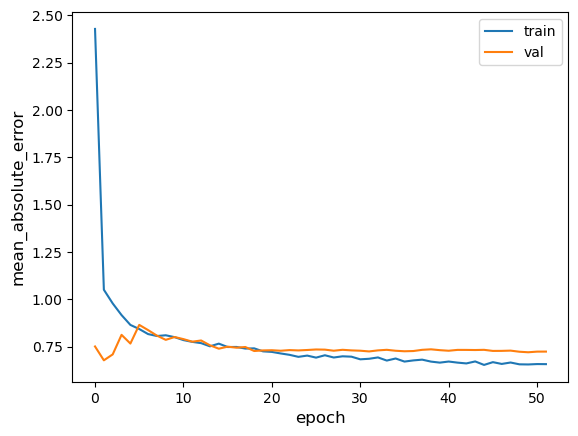

64/64 [==============================] - 1s 8ms/step - loss: 0.9176 - mean_absolute_error: 0.7464
Test accuracy 0.7464373707771301
Test loss 0.9176166653633118


In [185]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [186]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [187]:
rmse(y_test.values, y_test_pred)

3.823469082744734

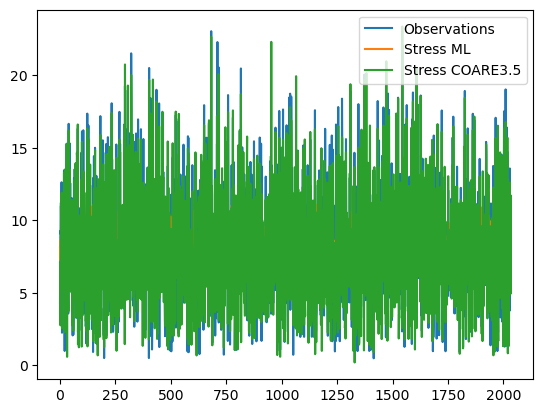

In [188]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

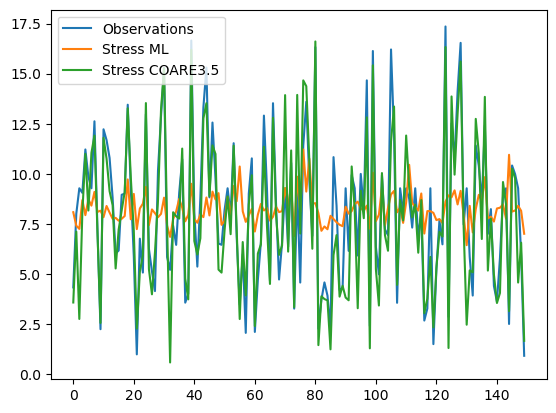

In [189]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [190]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.42559511],
       [0.42559511, 1.        ]])

In [191]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

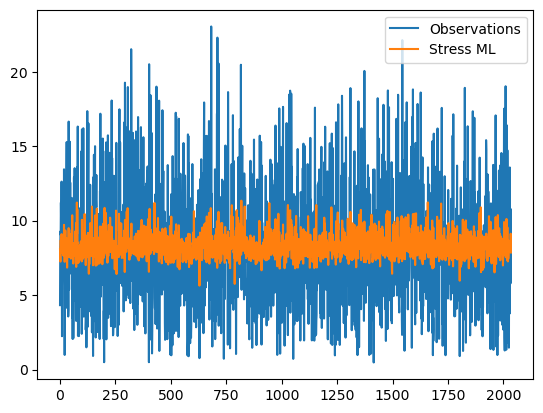

In [192]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [193]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

In [194]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

3.823469082744734

Text(0, 0.5, 'Wind speed ML [m/s]')

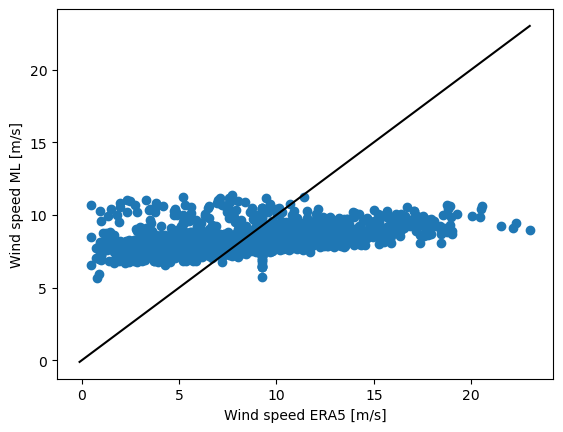

In [195]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [196]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [197]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [198]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 632ms/step - loss: 24.3364 - mean_absolute_error: 3.4675 - val_loss: 0.8728 - val_mean_absolute_error: 0.7099
Epoch 2/1000
3/3 [==============================] - 2s 577ms/step - loss: 4.1756 - mean_absolute_error: 1.5983 - val_loss: 0.7255 - val_mean_absolute_error: 0.6431
Epoch 3/1000
3/3 [==============================] - 2s 575ms/step - loss: 2.4445 - mean_absolute_error: 1.2317 - val_loss: 1.3417 - val_mean_absolute_error: 0.8968
Epoch 4/1000
3/3 [==============================] - 2s 567ms/step - loss: 1.6700 - mean_absolute_error: 0.9836 - val_loss: 1.3113 - val_mean_absolute_error: 0.9447
Epoch 5/1000
3/3 [==============================] - 2s 559ms/step - loss: 1.5303 - mean_absolute_error: 0.9427 - val_loss: 2.9997 - val_mean_absolute_error: 1.5169
Epoch 6/1000
3/3 [==============================] - 2s 565ms/step - loss: 1.5279 - mean_absolute_error: 0.9396 - val_loss: 3.4054 - val_mean_absolute_error: 1.6795
Epoch 7/1000
3/

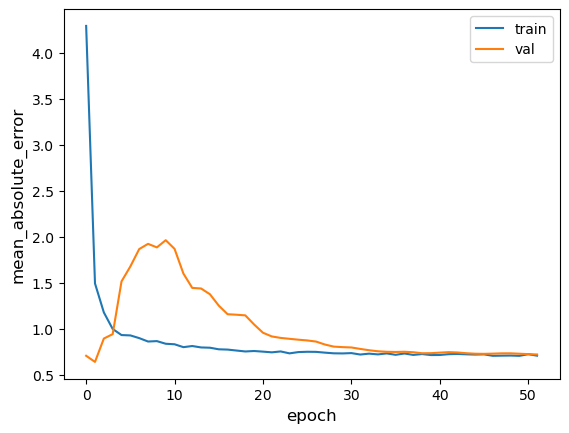

64/64 [==============================] - 2s 24ms/step - loss: 0.9255 - mean_absolute_error: 0.7439
Test accuracy 0.7439292073249817
Test loss 0.9255258440971375


In [199]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [200]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [201]:
rmse(y_test.values, y_test_pred)

3.8151983241227745

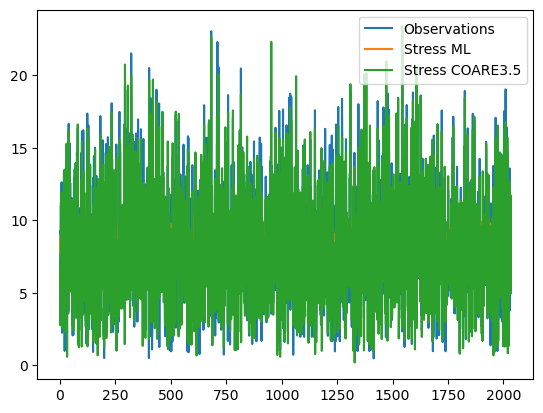

In [202]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

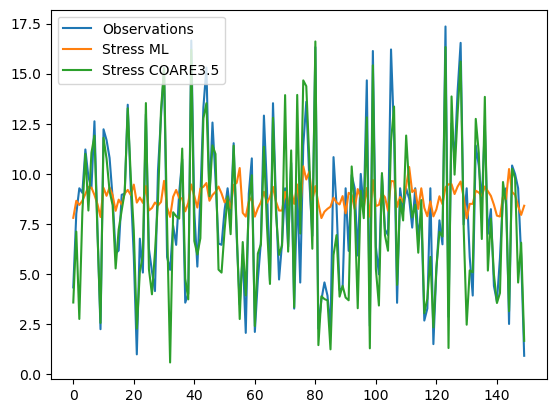

In [203]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [204]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.56186264],
       [0.56186264, 1.        ]])

In [205]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

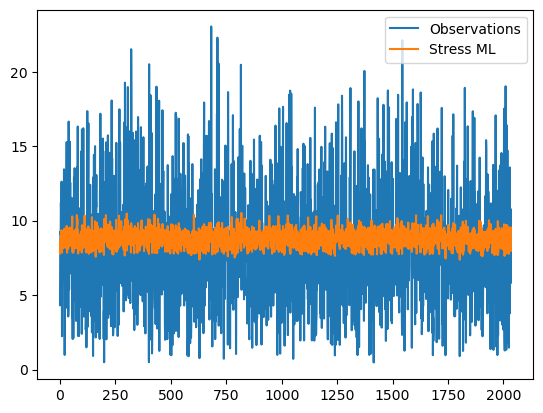

In [206]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [207]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

In [208]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

3.8151983241227745

Text(0, 0.5, 'Wind speed ML [m/s]')

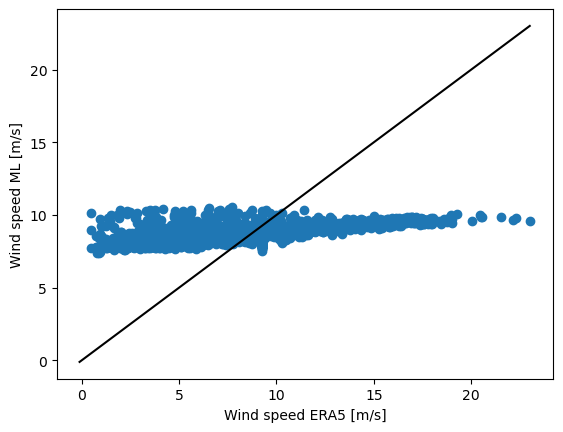

In [209]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [210]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [211]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [212]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 621ms/step - loss: 18.1937 - mean_absolute_error: 2.9321 - val_loss: 1.0192 - val_mean_absolute_error: 0.7844
Epoch 2/1000
3/3 [==============================] - 2s 519ms/step - loss: 3.9524 - mean_absolute_error: 1.5926 - val_loss: 1.1168 - val_mean_absolute_error: 0.8128
Epoch 3/1000
3/3 [==============================] - 1s 503ms/step - loss: 2.0068 - mean_absolute_error: 1.1230 - val_loss: 2.0145 - val_mean_absolute_error: 1.0711
Epoch 4/1000
3/3 [==============================] - 2s 528ms/step - loss: 1.6193 - mean_absolute_error: 1.0031 - val_loss: 1.3764 - val_mean_absolute_error: 0.9481
Epoch 5/1000
3/3 [==============================] - 2s 523ms/step - loss: 1.5175 - mean_absolute_error: 0.9655 - val_loss: 2.1258 - val_mean_absolute_error: 1.2614
Epoch 6/1000
3/3 [==============================] - 2s 533ms/step - loss: 1.3417 - mean_absolute_error: 0.8826 - val_loss: 2.8686 - val_mean_absolute_error: 1.4925
Epoch 7/1000
3/

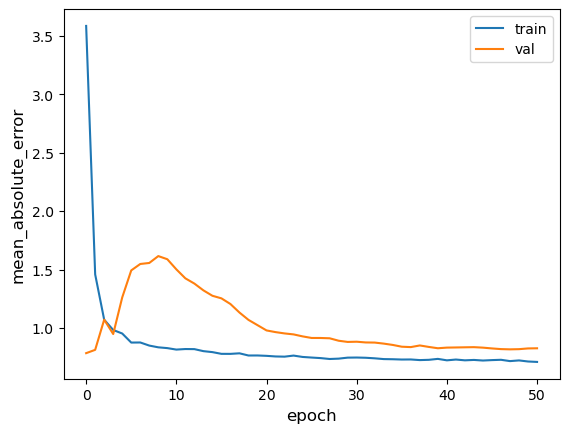

64/64 [==============================] - 1s 22ms/step - loss: 1.1325 - mean_absolute_error: 0.8390
Test accuracy 0.838968813419342
Test loss 1.1324642896652222


In [213]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [214]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [215]:
rmse(y_test.values, y_test_pred)

4.03136554248153

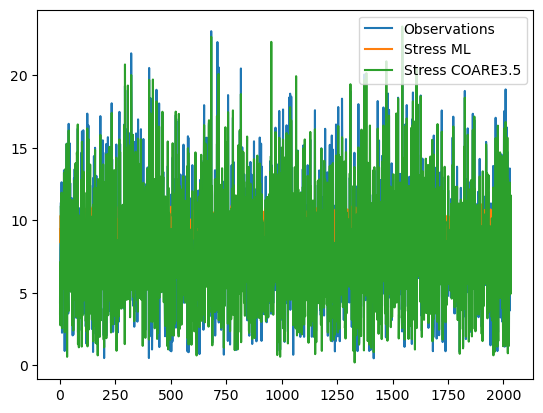

In [216]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

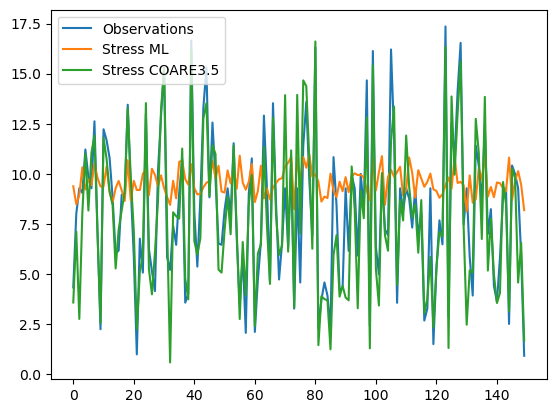

In [217]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [218]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.25938352],
       [0.25938352, 1.        ]])

In [219]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

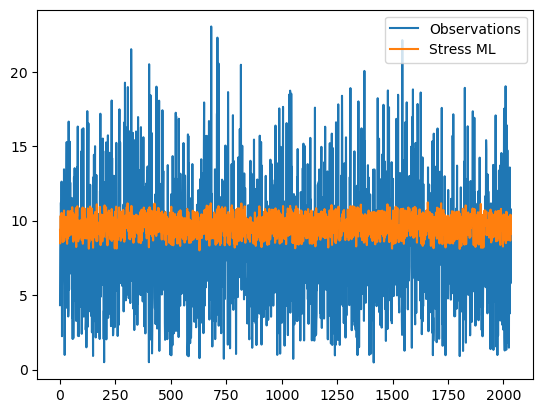

In [220]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [221]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

In [222]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

4.03136554248153

Text(0, 0.5, 'Wind speed ML [m/s]')

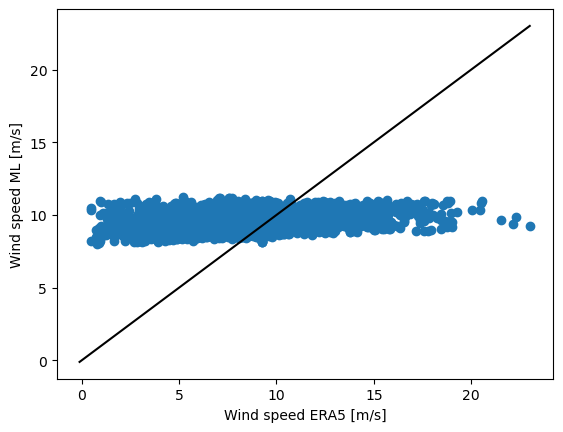

In [223]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [224]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [225]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [226]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 636ms/step - loss: 24.1802 - mean_absolute_error: 3.3125 - val_loss: 1.1203 - val_mean_absolute_error: 0.8165
Epoch 2/1000
3/3 [==============================] - 2s 571ms/step - loss: 3.6556 - mean_absolute_error: 1.5265 - val_loss: 0.8519 - val_mean_absolute_error: 0.7121
Epoch 3/1000
3/3 [==============================] - 2s 557ms/step - loss: 2.1201 - mean_absolute_error: 1.1359 - val_loss: 0.7872 - val_mean_absolute_error: 0.6771
Epoch 4/1000
3/3 [==============================] - 2s 545ms/step - loss: 1.6980 - mean_absolute_error: 1.0128 - val_loss: 2.4875 - val_mean_absolute_error: 1.3497
Epoch 5/1000
3/3 [==============================] - 2s 541ms/step - loss: 1.4145 - mean_absolute_error: 0.9132 - val_loss: 7.1256 - val_mean_absolute_error: 2.5078
Epoch 6/1000
3/3 [==============================] - 2s 553ms/step - loss: 1.4367 - mean_absolute_error: 0.9121 - val_loss: 13.8161 - val_mean_absolute_error: 3.5304
Epoch 7/1000
3

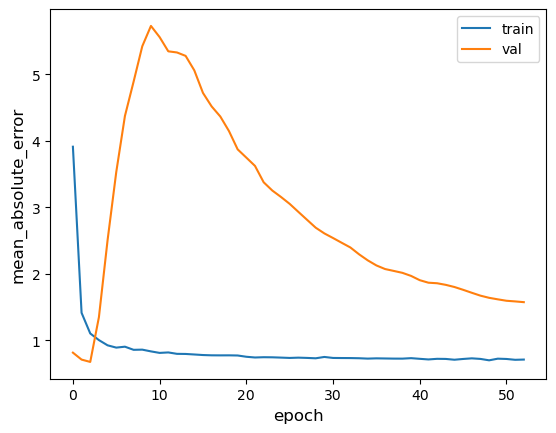

64/64 [==============================] - 2s 24ms/step - loss: 80.1148 - mean_absolute_error: 8.1697
Test accuracy 8.169676780700684
Test loss 80.11480712890625


In [227]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [228]:
y_test_pred = multi_dense_model.predict(x_test)

In [229]:
rmse(y_test.values, y_test_pred)

9.09971743141465

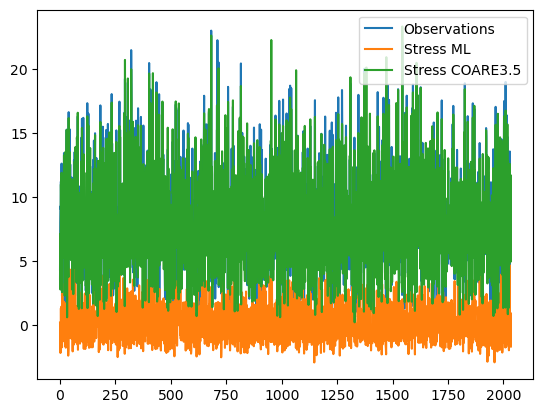

In [230]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

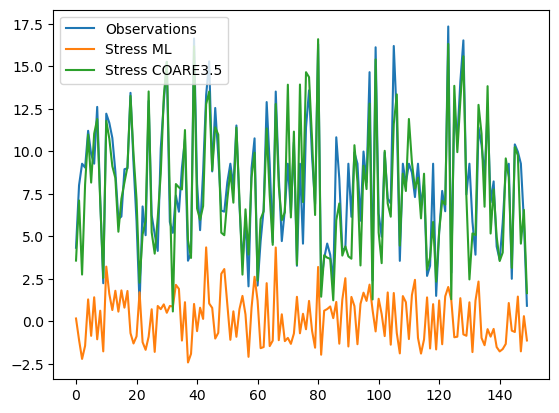

In [231]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [232]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.24385101],
       [0.24385101, 1.        ]])

In [233]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.86700642],
       [0.86700642, 1.        ]])

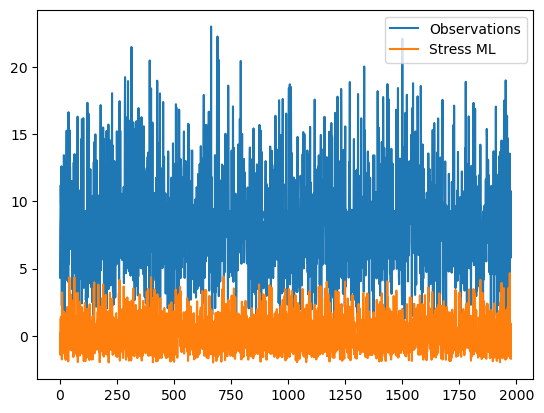

In [234]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [235]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.87187514],
       [0.87187514, 1.        ]])

In [236]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

9.119240614112757

Text(0, 0.5, 'Stress ML [N/m²]')

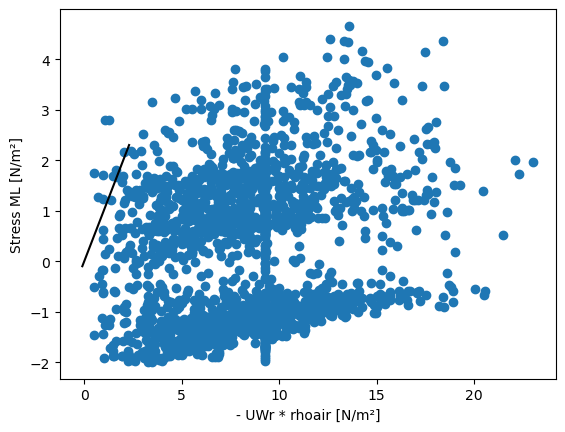

In [237]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 